&nbsp;
<div style="text-align: center;">

## <span style="color: black;">Website SuperClassics - Europe Classic Cars</span>

&nbsp;

![SuperClassics Logo](superclassics_logo.png)

&nbsp;

### <span style="color: black;">Gartner Analysis</span>

#### <span style="color: #003E99"> *41 Brands, 944 suppliers* </font> </span>

## Index

- [<font color='black'> 1. Packages installation</font>](#1)

- [<font color='black'> 2. Data importation</font>](#2)

- [<font color='black'> 3. Data Preprocessing</font>](#3)
    - [<font color='black'> 3.1. Data Normalization (Min-Max) </font>](#3.1)
      
- [<font color='black'> 4. Clustering </font>](#4)
    - [<font color='black'> 4.1. Elbow method </font>](#4.1)
    - [<font color='black'> 4.2. Silhouette plot and value </font>](#4.2)
    - [<font color='black'> 4.3. Final model </font>](#4.3)



## 1. Packages installation
<a id='1'>

In [24]:
#!!!INSTALL FIRST TIME!!!

#!pip3 install yellowbrick
#!pip3 install scipy

In [25]:
# dataframe
import pandas as pd

# array
import numpy as np

# normalization
from sklearn.preprocessing import MinMaxScaler

# graph
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans

#Metrics
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from scipy import stats


## 2. Data importation
<a id='2'>

In [26]:
db0 = pd.read_csv('Suppliers_factors')

In [27]:
db0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      57 non-null     object 
 1   MostProducedCountry        55 non-null     object 
 2   Carbon_footprint_mean      57 non-null     float64
 3   Supplier_quantity          57 non-null     int64  
 4   Google Hits                57 non-null     int64  
 5   Carbon_footprint_mean_log  57 non-null     float64
 6   Google Hits_log            57 non-null     float64
 7   Supplier_quantity_log      57 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 3.7+ KB


In [28]:
db0.head()

,Brand,MostProducedCountry,Carbon_footprint_mean,Supplier_quantity,Google Hits,Carbon_footprint_mean_log,Google Hits_log,Supplier_quantity_log
0,AC,Australia,1044.000000,4,137000000,6.950815,18.735491,1.386294
1,Abarth,Belgium,1028.833333,4,24700000,6.936181,17.022314,1.386294
2,Alfa Romeo,Netherlands,720.161765,63,52800000,6.579476,17.782022,4.143135
3,Allard,United States,1002.000000,1,1890000,6.909753,14.452087,0.000000
4,Alvis,United Kingdom,1305.000000,5,3620000,7.173958,15.101985,1.609438


In [29]:
list = db0['Brand'].unique().tolist()
print(list)

['AC', 'Abarth', 'Alfa Romeo', 'Allard', 'Alvis', 'Aston Martin', 'Austin', 'BMW', 'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Caterham', 'Chevrolet', 'Chrysler', 'Citroën', 'DKW', 'Daimler', 'Datsun', 'De Tomaso', 'Facel Vega', 'Ferrari', 'Fiat', 'Ford', 'Glas', 'Hillman', 'Holden', 'Lancia', 'Land Rover', 'Lotus', 'MG', 'Maserati', 'Mazda', 'Mini', 'Morgan', 'Morris', 'NSU', 'Opel', 'Packard', 'Panhard', 'Peugeot', 'Pontiac', 'Porsche', 'Range Rover', 'Reliant', 'Renault', 'Riley', 'Rover', 'Saab', 'Simca', 'Studebaker', 'Subaru', 'TVR', 'Toyota', 'Triumph', 'Volkswagen', 'Škoda']


In [30]:
#remove brands not known
db0 = db0[~db0['Brand'].isin(['Glas','Mini','AC','American Brands','British Brands',
                              'Classic Car Dealer','Customs and Hot Rods', 'East German Brands', 
                              'European Brands','French Brands', 'German Brands',
                             'Italian Brands', 'Japanese Brands','Kitcars', 'Military Vehicles',
                             'Pre-War Cars', 'Prestige and Supercars', 'Race and rally cars',
                             'Russian Brands', 'Trucks and Trailers','Ford (USA)','Youngtimers', 'Caterham','Packard',
                             'Trabant', 'Studebaker', 'Hillman', 'Marcos','TVR'])]

In [31]:
list = db0['Brand'].unique().tolist()
print(list)

['Abarth', 'Alfa Romeo', 'Allard', 'Alvis', 'Aston Martin', 'Austin', 'BMW', 'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Citroën', 'DKW', 'Daimler', 'Datsun', 'De Tomaso', 'Facel Vega', 'Ferrari', 'Fiat', 'Ford', 'Holden', 'Lancia', 'Land Rover', 'Lotus', 'MG', 'Maserati', 'Mazda', 'Morgan', 'Morris', 'NSU', 'Opel', 'Panhard', 'Peugeot', 'Pontiac', 'Porsche', 'Range Rover', 'Reliant', 'Renault', 'Riley', 'Rover', 'Saab', 'Simca', 'Subaru', 'Toyota', 'Triumph', 'Volkswagen', 'Škoda']


In [32]:
len(list)

49

## 3. Data Normalization (Min-Max)
<a id='3'>

<span style='color:blue'> Choose the Top X Google Hits

In [34]:
db = db0.sort_values(by='Google Hits', ascending=False).head(60)

In [36]:
db.reset_index(drop=True, inplace=True)

In [37]:
db1 = db.copy()
columns_to_normalize = ['Carbon_footprint_mean', 'Google Hits']

# MinMax
scaler = MinMaxScaler(feature_range=(0,1))
db2 = pd.DataFrame(scaler.fit_transform(db1[columns_to_normalize]),columns=[col + '_mm' for col in columns_to_normalize])

# new columns
db1 = pd.concat([db1, db2], axis=1)
db1.head()


,Brand,MostProducedCountry,Carbon_footprint_mean,Supplier_quantity,Google Hits,Carbon_footprint_mean_log,Google Hits_log,Supplier_quantity_log,Carbon_footprint_mean_mm,Google Hits_mm
0,Ford,Germany,843.933333,15,225000000,6.738074,19.231611,2.708050,0.296804,1.000000
1,BMW,Germany,713.313725,51,183000000,6.569921,19.024997,3.931826,0.239364,0.812661
2,Toyota,Germany,560.500000,4,170000000,6.328829,18.951309,1.386294,0.172164,0.754676
3,Volkswagen,Germany,831.708609,157,131000000,6.723482,18.690708,5.056246,0.291429,0.580718
4,Porsche,Germany,693.765258,214,125000000,6.542134,18.643824,5.365976,0.230767,0.553956


In [38]:
pd.set_option('display.max_rows', len(db1))

selected_columns = db1[['Brand', 'MostProducedCountry', 'Carbon_footprint_mean','Supplier_quantity','Google Hits']]

selected_columns

,Brand,MostProducedCountry,Carbon_footprint_mean,Supplier_quantity,Google Hits
0,Ford,Germany,843.933333,15,225000000
1,BMW,Germany,713.313725,51,183000000
2,Toyota,Germany,560.500000,4,170000000
3,Volkswagen,Germany,831.708609,157,131000000
4,Porsche,Germany,693.765258,214,125000000
5,Chevrolet,United States,790.738095,43,118000000
6,MG,United Kingdom,1034.128571,70,85800000
7,Ferrari,United Kingdom,823.195652,45,81700000
8,Morgan,Germany,642.600000,15,79600000
9,Mazda,United Kingdom,914.333333,9,73400000


## 4. Clustering 
<a id='4'>

### 4.1. Elbow method
<a id='4.1'>

C:\Users\InesC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\InesC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\InesC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\InesC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

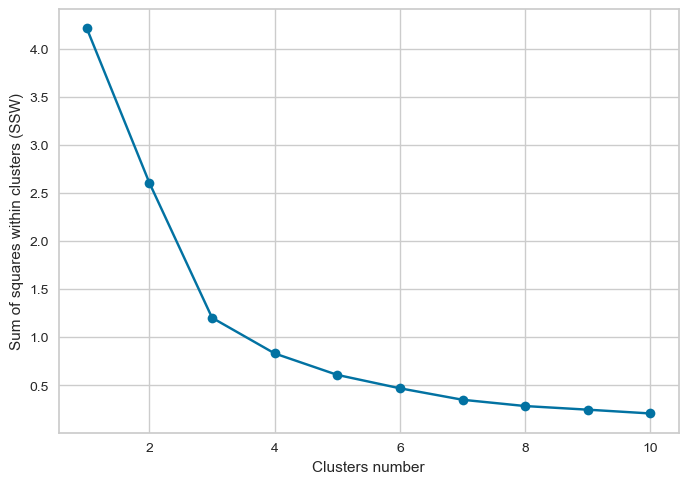

In [39]:
data = db1[['Carbon_footprint_mean_mm', 'Google Hits_mm']]

cost = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(data)
    cost.append(kmeans.inertia_)


plt.plot(range(1, 11), cost, marker='o')
plt.xlabel('Clusters number')
plt.ylabel('Sum of squares within clusters (SSW)')
plt.savefig('Modelling_GH_CO2_elbow_maxsamplesize.eps')
plt.savefig('Modelling_GH_CO2_elbow_maxsamplesize.png')
plt.show()

<span style='color:blue'> The elbow method shows that data should be split in four ou five clusters, according to the inflection point equal to four.

### 4.2. Silhouette plot and value
<a id='4.2'>

C:\Users\InesC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\InesC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\InesC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\InesC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

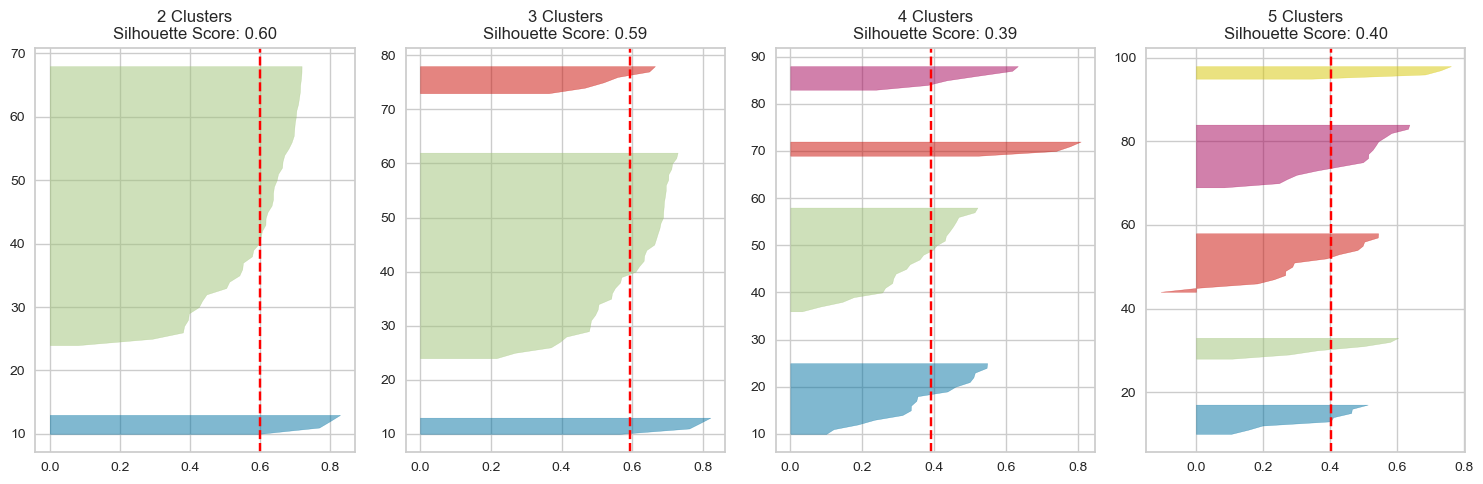

In [40]:
#data
X = db1[['Carbon_footprint_mean_mm', 'Google Hits_mm']]

#number of clusters to try
clusters_list = [2, 3, 4, 5]

#graph
fig, axs = plt.subplots(1, len(clusters_list), figsize=(15, 5))
silhouette_scores = []
for ax, n_clusters in zip(axs, clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # graph
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
    # adjust data to model
    visualizer.fit(X)
    labels = kmeans.labels_
    # Silhoette score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    # title with number of clusters and score
    ax.set_title(f'{n_clusters} Clusters\nSilhouette Score: {silhouette_avg:.2f}')

plt.tight_layout()
plt.savefig('Modelling_GH_co2_silhouette_plots_maxsamplesize.eps')
plt.show()


<span style='color:blue'> From the data distribution results for each cluster group (2, 3, 4, or 5) and the silhouette score it is possible to verify that the best data distribution is made with three clusters (silhouette score = 0.48).


### 4.3. Final model
<a id='4.3'>

C:\Users\InesC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\InesC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\InesC\AppData\Local\Temp\ipykernel_14280\3049867057.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((centroids[cluster_label, 1], centroids[cluster_label, 0]),
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


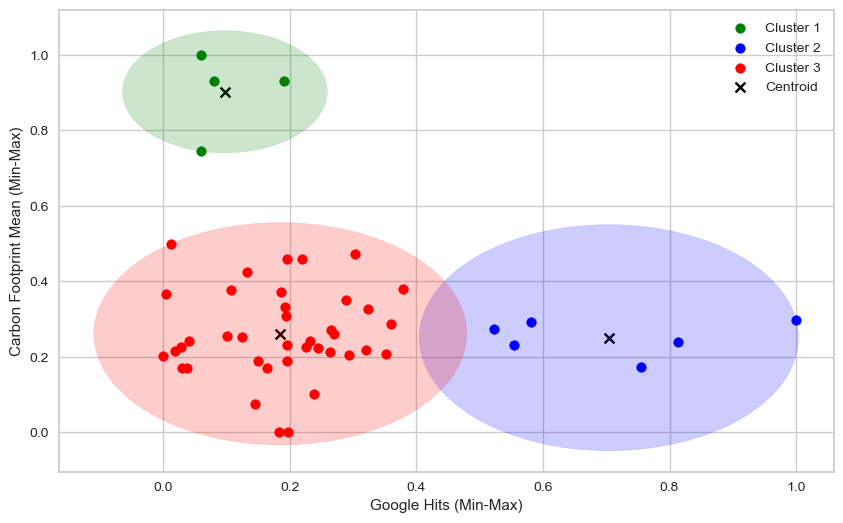

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

data = db1[['Carbon_footprint_mean_mm', 'Google Hits_mm']]


num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)

kmeans.fit(data)

db1['Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(data, kmeans.labels_)

centroids = kmeans.cluster_centers_

cluster_colors = {0: 'green', 1: 'blue', 2: 'red'}

plt.figure(figsize=(10, 6))
for cluster_label in range(num_clusters):
    cluster_data = db1[db1['Cluster'] == cluster_label]
    color = cluster_colors[cluster_label]
    plt.scatter(cluster_data['Google Hits_mm'], cluster_data['Carbon_footprint_mean_mm'], 
                label=f'Cluster {cluster_label + 1}', color=color)

plt.scatter(centroids[:, 1], centroids[:, 0], s=50, c='black', marker='x', label='Centroid')


for cluster_label in range(num_clusters):
    cluster_data = db1[db1['Cluster'] == cluster_label]
    

    distances = np.sqrt((cluster_data['Google Hits_mm'] - centroids[cluster_label, 1]) ** 2 +
                        (cluster_data['Carbon_footprint_mean_mm'] - centroids[cluster_label, 0]) ** 2)
    max_distance = distances.max()
    
  
    circle_color = cluster_colors[cluster_label]
    circle = plt.Circle((centroids[cluster_label, 1], centroids[cluster_label, 0]), 
                        max_distance, color=circle_color, alpha=0.2, fill=True, linestyle='-', edgecolor='black')
    plt.gca().add_patch(circle)

plt.xlabel('Google Hits (Min-Max)')
plt.ylabel('Carbon Footprint Mean (Min-Max)')
plt.legend()
plt.savefig('Modelling_GH_CO2_clustering_maxsamplesize.eps', dpi=300, transparent=True)
plt.savefig('Modelling_GH_CO2_clustering_maxsamplesize.png', dpi=300, transparent=True)
plt.show()


In [42]:
data.head()

,Carbon_footprint_mean_mm,Google Hits_mm
0,0.296804,1.000000
1,0.239364,0.812661
2,0.172164,0.754676
3,0.291429,0.580718
4,0.230767,0.553956


In [43]:
# cluster results

db1['Cluster'] = kmeans.labels_
result_table = db1[['Brand', 'Google Hits_mm', 'Carbon_footprint_mean_mm', 'Cluster']]
result_table['Cluster'] = result_table['Cluster'].replace({0: 1, 1: 2, 2: 3})
print(result_table)


           Brand  Google Hits_mm  Carbon_footprint_mean_mm  Cluster
0           Ford        1.000000                  0.296804        2
1            BMW        0.812661                  0.239364        2
2         Toyota        0.754676                  0.172164        2
3     Volkswagen        0.580718                  0.291429        2
4        Porsche        0.553956                  0.230767        2
5      Chevrolet        0.522733                  0.273412        2
6             MG        0.379106                  0.380444        3
7        Ferrari        0.360819                  0.287685        3
8         Morgan        0.351452                  0.208267        3
9          Mazda        0.323797                  0.327763        3
10       Renault        0.321121                  0.218620        3
11         Rover        0.302833                  0.471353        3
12       Peugeot        0.293020                  0.204870        3
13       Triumph        0.289451                

C:\Users\InesC\AppData\Local\Temp\ipykernel_14280\2601026603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_table['Cluster'] = result_table['Cluster'].replace({0: 1, 1: 2, 2: 3})


In [44]:
db1['Cluster'] = db1['Cluster'].replace({0: 1, 1: 2, 2: 3})

In [45]:
# evaluate clustering groups significance and quality with 

anova_results_carbon = stats.f_oneway(
    db1[db1['Cluster'] == 1]['Carbon_footprint_mean_mm'],
    db1[db1['Cluster'] == 2]['Carbon_footprint_mean_mm'],
    db1[db1['Cluster'] == 3]['Carbon_footprint_mean_mm']
)

anova_results_google = stats.f_oneway(
    db1[db1['Cluster'] == 1]['Google Hits_mm'],
    db1[db1['Cluster'] == 2]['Google Hits_mm'],
    db1[db1['Cluster'] == 3]['Google Hits_mm']
)

print(f"ANOVA results for Carbon Footprint Mean Z-Score: F-value = {anova_results_carbon.statistic}, p-value = {anova_results_carbon.pvalue}")
print(f"ANOVA results for Google Hits Z-Score: F-value = {anova_results_google.statistic}, p-value = {anova_results_google.pvalue}")


ANOVA results for Carbon Footprint Mean Z-Score: F-value = 60.46337666505371, p-value = 1.3345454143011245e-13
ANOVA results for Google Hits Z-Score: F-value = 54.870055418831996, p-value = 6.57989709411448e-13


In [47]:
import pandas as pd

def sum_of_squares(data, global_mean=None):
    if global_mean is None:
        global_mean = data.mean()
    return ((data - global_mean) ** 2).sum()

num_clusters = db1['Cluster'].nunique()

results = {'Carbon_footprint_mean_mm': {}, 'Google_Hits_mm': {}}

global_mean_carbon = db1['Carbon_footprint_mean_mm'].mean()
global_mean_google = db1['Google Hits_mm'].mean()

for cluster in range(1, num_clusters + 1):
    db_cluster = db1[db1['Cluster'] == cluster]
    cluster_size = len(db_cluster)

    if cluster_size > 0:    
        mean_carbon = db_cluster['Carbon_footprint_mean_mm'].mean()
        mean_google = db_cluster['Google Hits_mm'].mean()
        
        sst_carbon = sum_of_squares(db_cluster['Carbon_footprint_mean_mm'], mean_carbon)
        sst_google = sum_of_squares(db_cluster['Google Hits_mm'], mean_google)
        
        cluster_means_carbon = db1.groupby('Cluster')['Carbon_footprint_mean_mm'].mean()
        cluster_means_google = db1.groupby('Cluster')['Google Hits_mm'].mean()
        
        ssb_carbon = sum_of_squares(cluster_means_carbon, global_mean_carbon)
        ssb_google = sum_of_squares(cluster_means_google, global_mean_google)
        
        ssb_carbon *= cluster_size / len(db1)
        ssb_google *= cluster_size / len(db1)
        
        ssw_carbon = sst_carbon - (ssb_carbon / num_clusters)
        ssw_google = sst_google - (ssb_google / num_clusters)
        
        dfb = num_clusters - 1
        dfw_carbon = len(db1) - num_clusters
        dfw_google = len(db1) - num_clusters
        
        if dfw_carbon > 0 and dfw_google > 0:
            msb_carbon = ssb_carbon / dfb
            msw_carbon = ssw_carbon / dfw_carbon
            msb_google = ssb_google / dfb
            msw_google = ssw_google / dfw_google
    
            results['Carbon_footprint_mean_mm'][f'Cluster {cluster}'] = {
                'SST': sst_carbon, 'SSB': ssb_carbon, 'SSW': ssw_carbon, 'MSB': msb_carbon, 'MSW': msw_carbon
            }
            results['Google_Hits_mm'][f'Cluster {cluster}'] = {
                'SST': sst_google, 'SSB': ssb_google, 'SSW': ssw_google, 'MSB': msb_google, 'MSW': msw_google
            }
        else:
            print(f"Graus de liberdade inválidos para o cluster {cluster}.")
    else:
        print(f"Cluster {cluster} não contém dados suficientes.")

for variable, clusters in results.items():
    print(f"\nResultados para {variable}:")
    for cluster, metrics in clusters.items():
        print(f"{cluster}:")
        print(f"  SST = {metrics['SST']:.4f}")
        print(f"  SSB = {metrics['SSB']:.4f}")
        print(f"  SSW = {metrics['SSW']:.4f}")
        print(f"  MSB = {metrics['MSB']:.4f}")
        print(f"  MSW = {metrics['MSW']:.4f}")



Resultados para Carbon_footprint_mean_mm:
Cluster 1:
  SST = 0.0361
  SSB = 0.0289
  SSW = 0.0264
  MSB = 0.0145
  MSW = 0.0006
Cluster 2:
  SST = 0.0110
  SSB = 0.0434
  SSW = -0.0035
  MSB = 0.0217
  MSW = -0.0001
Cluster 3:
  SST = 0.5300
  SSB = 0.2822
  SSW = 0.4360
  MSB = 0.1411
  MSW = 0.0095

Resultados para Google_Hits_mm:
Cluster 1:
  SST = 0.0120
  SSB = 0.0194
  SSW = 0.0055
  MSB = 0.0097
  MSW = 0.0001
Cluster 2:
  SST = 0.1726
  SSB = 0.0291
  SSW = 0.1629
  MSB = 0.0146
  MSW = 0.0035
Cluster 3:
  SST = 0.4403
  SSB = 0.1893
  SSW = 0.3772
  MSB = 0.0947
  MSW = 0.0082
